In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns 


In [20]:
df = pd.read_csv('./pandas/covid_19_data.csv')
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
285302,285303,05/02/2021,Zaporizhia Oblast,Ukraine,2021-05-03 04:20:39,96531.0,1919.0,78700.0
285303,285304,05/02/2021,Zeeland,Netherlands,2021-05-03 04:20:39,26045.0,233.0,0.0
285304,285305,05/02/2021,Zhejiang,Mainland China,2021-05-03 04:20:39,1344.0,1.0,1322.0
285305,285306,05/02/2021,Zhytomyr Oblast,Ukraine,2021-05-03 04:20:39,84641.0,1597.0,68529.0


In [4]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate']) # Para cambiar el formato del tiempo

In [5]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [6]:
df = df[['ObservationDate','Country/Region','Confirmed','Deaths','Recovered']]
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
285302,2021-05-02,Ukraine,96531.0,1919.0,78700.0
285303,2021-05-02,Netherlands,26045.0,233.0,0.0
285304,2021-05-02,Mainland China,1344.0,1.0,1322.0
285305,2021-05-02,Ukraine,84641.0,1597.0,68529.0


In [7]:
df_time = df.groupby('ObservationDate').sum()
df_time.head(5)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0


In [8]:
df1 = df_time['Confirmed'].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [9]:
df2 = df_time['Deaths'].iloc[12:17]
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

In [10]:
df1 - df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

In [11]:
pd.options.display.float_format='{:.6f}'.format

In [12]:
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.000000,17.000000,30.000000
2020-01-23,1097.000000,34.000000,60.000000
2020-01-24,941.000000,26.000000,39.000000
2020-01-25,1437.000000,42.000000,42.000000
2020-01-26,2118.000000,56.000000,56.000000
...,...,...,...
2021-04-28,149622864.000000,3150675.000000,86843039.000000
2021-04-29,150520466.000000,3165665.000000,87550355.000000
2021-04-30,151399480.000000,3180238.000000,88236951.000000


In [13]:
df_time.diff() # Diff resta el dia a dia con el dia previo 

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,540.000000,17.000000,30.000000
2020-01-24,-156.000000,-8.000000,-21.000000
2020-01-25,496.000000,16.000000,3.000000
2020-01-26,681.000000,14.000000,14.000000
...,...,...,...
2021-04-28,905992.000000,15719.000000,596665.000000
2021-04-29,897602.000000,14990.000000,707316.000000
2021-04-30,879014.000000,14573.000000,686596.000000


In [14]:
df_time.diff().mean()

Confirmed   327257.045064
Deaths        6864.997854
Recovered   191656.504292
dtype: float64

In [15]:
 df_diff = df_time.diff()

In [16]:
df_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 557.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 30.0}}

In [17]:
df_diff = df_diff.fillna({'Confirmed': 557.0,
 'Deaths': 17.0,
 'Recovered':30.0}) # es para que el valor faltante no quede nulo y queda con el valor del primer dia

In [18]:
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.000000,17.000000,30.000000
2020-01-23,540.000000,17.000000,30.000000
2020-01-24,-156.000000,-8.000000,-21.000000
2020-01-25,496.000000,16.000000,3.000000
2020-01-26,681.000000,14.000000,14.000000
...,...,...,...
2021-04-28,905992.000000,15719.000000,596665.000000
2021-04-29,897602.000000,14990.000000,707316.000000
2021-04-30,879014.000000,14573.000000,686596.000000


In [19]:
df_diff.cumsum() # suma acumulativa

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.000000,17.000000,30.000000
2020-01-23,1097.000000,34.000000,60.000000
2020-01-24,941.000000,26.000000,39.000000
2020-01-25,1437.000000,42.000000,42.000000
2020-01-26,2118.000000,56.000000,56.000000
...,...,...,...
2021-04-28,149622864.000000,3150675.000000,86843039.000000
2021-04-29,150520466.000000,3165665.000000,87550355.000000
2021-04-30,151399480.000000,3180238.000000,88236951.000000


In [20]:
df_diff.resample('7D').sum() # Estimaciones estadisticas, aqui utilizamos intervalos de 7 dias a 7 dias +

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5578.000000,131.000000,108.000000
2020-01-29,18314.000000,361.000000,749.000000
2020-02-05,20911.000000,621.000000,3827.000000
2020-02-12,30335.000000,894.000000,9668.000000
2020-02-19,5277.000000,701.000000,13553.000000
...,...,...,...
2021-03-31,4204648.000000,69009.000000,2479500.000000
2021-04-07,5023681.000000,86509.000000,3128937.000000
2021-04-14,5510025.000000,84870.000000,3634348.000000


In [21]:
df_diff.resample('W-Sun').sum() # La suma se realiza cada domingo

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,2118.000000,56.000000,56.000000
2020-02-02,14669.000000,306.000000,420.000000
2020-02-09,23364.000000,544.000000,2769.000000
2020-02-16,31075.000000,864.000000,7621.000000
2020-02-23,7759.000000,699.000000,12528.000000
...,...,...,...
2021-04-04,4137655.000000,69248.000000,2401370.000000
2021-04-11,4721160.000000,83159.000000,2965552.000000
2021-04-18,5358370.000000,82829.000000,3375330.000000


In [22]:
df_diff.resample('M').sum() # suma mensual

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9925.000000,213.000000,225.000000
2020-02-29,76087.000000,2728.000000,39556.000000
2020-03-31,771462.000000,39241.000000,138226.000000
2020-04-30,2401731.000000,192391.000000,837095.000000
2020-05-31,2910561.000000,138239.000000,1626127.000000
2020-06-30,4319842.000000,138411.000000,2711439.000000
2020-07-31,7127806.000000,168505.000000,5019965.000000
2020-08-31,7909780.000000,171266.000000,6449484.000000
2020-09-30,8504867.000000,163907.000000,6847448.000000


In [23]:
df_diff.resample('M').count() # suma por datos mensual

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,31,31,31
2020-04-30,30,30,30
2020-05-31,31,31,31
2020-06-30,30,30,30
2020-07-31,31,31,31
2020-08-31,31,31,31
2020-09-30,30,30,30


In [24]:
df_diff.resample('M').mean() # Aplicando promedio en una frecuencia mensual

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,992.500000,21.300000,22.500000
2020-02-29,2623.689655,94.068966,1364.000000
2020-03-31,24885.870968,1265.838710,4458.903226
2020-04-30,80057.700000,6413.033333,27903.166667
2020-05-31,93889.064516,4459.322581,52455.709677
2020-06-30,143994.733333,4613.700000,90381.300000
2020-07-31,229929.225806,5435.645161,161934.354839
2020-08-31,255154.193548,5524.709677,208047.870968
2020-09-30,283495.566667,5463.566667,228248.266667


# Series de Tiempo: variables nulas (25/29)

In [25]:
df_diff.resample('12h').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.000000,17.000000,30.000000
2020-01-22 12:00:00,0.000000,0.000000,0.000000
2020-01-23 00:00:00,540.000000,17.000000,30.000000
2020-01-23 12:00:00,0.000000,0.000000,0.000000
2020-01-24 00:00:00,-156.000000,-8.000000,-21.000000
...,...,...,...
2021-04-30 00:00:00,879014.000000,14573.000000,686596.000000
2021-04-30 12:00:00,0.000000,0.000000,0.000000
2021-05-01 00:00:00,796679.000000,12345.000000,682450.000000


In [26]:
df_diff.resample('12h').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.000000,17.000000,30.000000
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,540.000000,17.000000,30.000000
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,-156.000000,-8.000000,-21.000000
...,...,...,...
2021-04-30 00:00:00,879014.000000,14573.000000,686596.000000
2021-04-30 12:00:00,NaN,NaN,NaN
2021-05-01 00:00:00,796679.000000,12345.000000,682450.000000


In [27]:
df_cum = df_diff.resample('12h').sum(min_count=1)

In [28]:
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.000000,17.000000,30.000000
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,540.000000,17.000000,30.000000
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,-156.000000,-8.000000,-21.000000
...,...,...,...
2021-04-30 00:00:00,879014.000000,14573.000000,686596.000000
2021-04-30 12:00:00,NaN,NaN,NaN
2021-05-01 00:00:00,796679.000000,12345.000000,682450.000000


In [29]:
df_cum.bfill() # Este copia el valor al valor que estaba nulo (hacia arriba)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.000000,17.000000,30.000000
2020-01-22 12:00:00,540.000000,17.000000,30.000000
2020-01-23 00:00:00,540.000000,17.000000,30.000000
2020-01-23 12:00:00,-156.000000,-8.000000,-21.000000
2020-01-24 00:00:00,-156.000000,-8.000000,-21.000000
...,...,...,...
2021-04-30 00:00:00,879014.000000,14573.000000,686596.000000
2021-04-30 12:00:00,796679.000000,12345.000000,682450.000000
2021-05-01 00:00:00,796679.000000,12345.000000,682450.000000


In [30]:
df_cum.ffill() # Este copia el valor al siguiente que es nulo

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.000000,17.000000,30.000000
2020-01-22 12:00:00,557.000000,17.000000,30.000000
2020-01-23 00:00:00,540.000000,17.000000,30.000000
2020-01-23 12:00:00,540.000000,17.000000,30.000000
2020-01-24 00:00:00,-156.000000,-8.000000,-21.000000
...,...,...,...
2021-04-30 00:00:00,879014.000000,14573.000000,686596.000000
2021-04-30 12:00:00,879014.000000,14573.000000,686596.000000
2021-05-01 00:00:00,796679.000000,12345.000000,682450.000000


In [31]:
df_cum = df_cum.interpolate()
df_cum # creando una interpolacion lineal ( Nos dice el valor medio al dia )

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.000000,17.000000,30.000000
2020-01-22 12:00:00,548.500000,17.000000,30.000000
2020-01-23 00:00:00,540.000000,17.000000,30.000000
2020-01-23 12:00:00,192.000000,4.500000,4.500000
2020-01-24 00:00:00,-156.000000,-8.000000,-21.000000
...,...,...,...
2021-04-30 00:00:00,879014.000000,14573.000000,686596.000000
2021-04-30 12:00:00,837846.500000,13459.000000,684523.000000
2021-05-01 00:00:00,796679.000000,12345.000000,682450.000000


In [32]:
df_cum['rate'] = 1- df_cum['Deaths']/df_cum['Confirmed'] 
 # La tasa de supervivencia al coronavirus

In [33]:
df_cum

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22 00:00:00,557.000000,17.000000,30.000000,0.969479
2020-01-22 12:00:00,548.500000,17.000000,30.000000,0.969006
2020-01-23 00:00:00,540.000000,17.000000,30.000000,0.968519
2020-01-23 12:00:00,192.000000,4.500000,4.500000,0.976562
2020-01-24 00:00:00,-156.000000,-8.000000,-21.000000,0.948718
...,...,...,...,...
2021-04-30 00:00:00,879014.000000,14573.000000,686596.000000,0.983421
2021-04-30 12:00:00,837846.500000,13459.000000,684523.000000,0.983936
2021-05-01 00:00:00,796679.000000,12345.000000,682450.000000,0.984504


In [34]:
df_cum = df_cum.reset_index()
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,557.000000,17.000000,30.000000,0.969479
1,2020-01-22 12:00:00,548.500000,17.000000,30.000000,0.969006
2,2020-01-23 00:00:00,540.000000,17.000000,30.000000,0.968519
3,2020-01-23 12:00:00,192.000000,4.500000,4.500000,0.976562
4,2020-01-24 00:00:00,-156.000000,-8.000000,-21.000000,0.948718
...,...,...,...,...,...
928,2021-04-30 00:00:00,879014.000000,14573.000000,686596.000000,0.983421
929,2021-04-30 12:00:00,837846.500000,13459.000000,684523.000000,0.983936
930,2021-05-01 00:00:00,796679.000000,12345.000000,682450.000000,0.984504
931,2021-05-01 12:00:00,551430.000000,9434.000000,537505.000000,0.982892


In [35]:
df_cum.groupby(pd.Grouper(key='ObservationDate', freq = 'M'))[['rate']].mean() # Tasa de supervivencia por messolamente

,rate
ObservationDate,
2020-01-31,0.975473
2020-02-29,0.940045
2020-03-31,0.953674
2020-04-30,0.919904
2020-05-31,0.951956
2020-06-30,0.967642
2020-07-31,0.976452
2020-08-31,0.978583
2020-09-30,0.980565


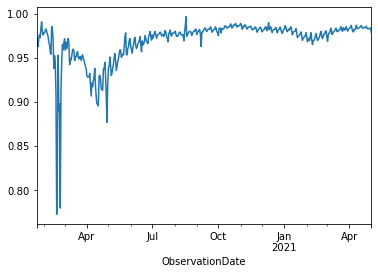

In [37]:
sr = df_cum.groupby(pd.Grouper(key='ObservationDate', freq = '1D'))['rate'].mean()
sr.plot() # Primera grafica

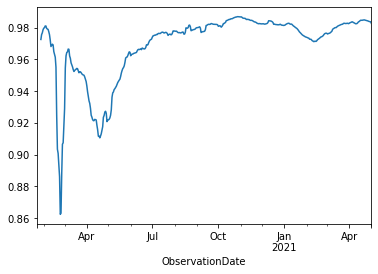

In [39]:
sr.rolling(window=7).mean().plot() # Permite hacer promedios de frecuencias 

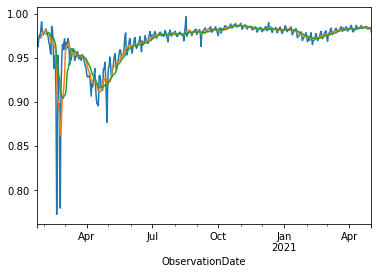

In [41]:
sr.plot()
sr.rolling(window=7).mean().plot()
sr.rolling(window=14).mean().plot()

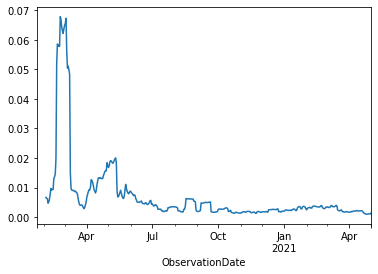

In [43]:
sr.rolling(window=14).apply(lambda x: np.std(x)).plot()

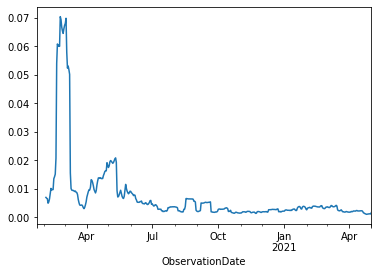

In [44]:
sr.rolling(window=14).std().plot()

# Visualización y graficación de datos (26/29)



In [47]:
pd.options.display.float_format='{:.0f}'.format

In [48]:
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending = False) # Ocurrencia en donde existe mas infectados de coronavirus

Country/Region
France                  5605532
Turkey                  4875388
India                   4665754
UK                      3861901
US                      3744830
                          ...  
Micronesia                    1
North Ireland                 1
Republic of the Congo         1
 Azerbaijan                   1
China                         0
Name: Confirmed, Length: 228, dtype: float64

In [50]:
list(df)

['ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']

In [52]:
df_time=df.groupby(['Country/Region', pd.Grouper(key='ObservationDate', freq='1D')]).sum()

In [53]:
df_time

Confirmed  Deaths  Recovered
Country/Region                 ObservationDate                              
 Azerbaijan                    2020-02-28               1       0          0
('St. Martin',)                2020-03-10               2       0          0
Afghanistan                    2020-02-24               1       0          0
                               2020-02-25               1       0          0
                               2020-02-26               1       0          0
...                                                   ...     ...        ...
occupied Palestinian territory 2020-03-12               0       0          0
                               2020-03-14               0       0          0
                               2020-03-15               0       0          0
                               2020-03-16               0       0          0
                               2020-03-17               0       0          0

[81549 rows x 3 columns]

In [55]:
df_chile = df_time.loc['Chile',:] #,: significa seleccionar todas las columnas 
df_chile

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-03-03,1,0,0
2020-03-04,1,0,0
2020-03-05,4,0,0
2020-03-06,4,0,0
2020-03-07,4,0,0
...,...,...,...
2021-04-28,1184271,26073,1120141
2021-04-29,1190991,26247,1125761
2021-04-30,1198245,26353,1129347


In [59]:
import matplotlib.pyplot as plt 

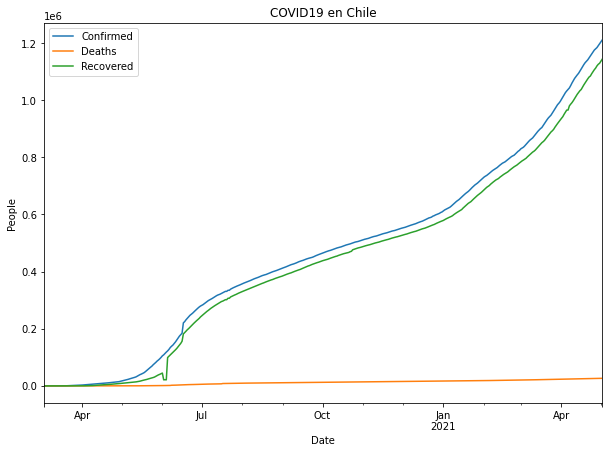

In [63]:
df_chile.plot(figsize=(10,7), title='COVID19 en Chile')
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

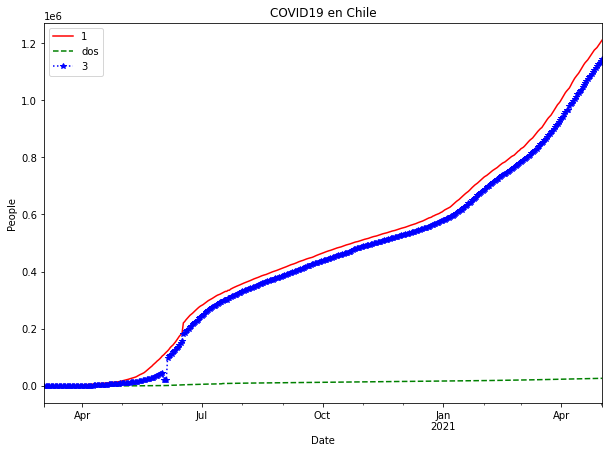

In [70]:
ax =df_chile.plot(figsize=(10,7), title='COVID19 en Chile',legend= False, style =['r-','g--','b:*'])
ax.legend(['1','dos','3'])
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

In [72]:
df_monthly = df_chile.resample('M').max()
df_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-03-31,2738,12,156
2020-04-30,16023,227,8580
2020-05-31,99688,1054,42727
2020-06-30,279393,5688,241229
2020-07-31,355667,9457,328327
2020-08-31,411726,11289,383879
2020-09-30,462991,12741,436589
2020-10-31,510256,14207,486642
2020-11-30,551743,15410,526604


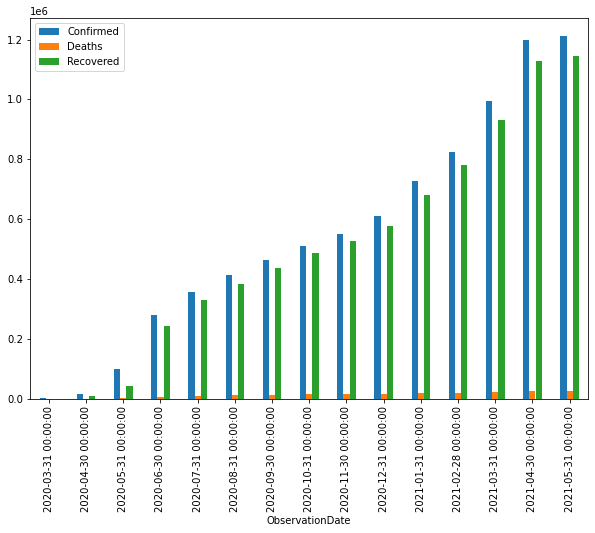

In [74]:
df_monthly.plot(figsize=(10,7),kind='bar')

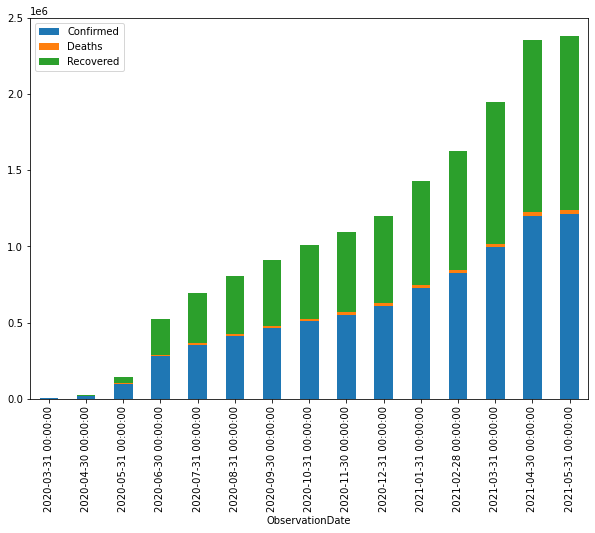

In [75]:
df_monthly.plot(figsize=(10,7),kind='bar', stacked=True)

In [78]:
df_monthly['Traitment'] = df_monthly['Confirmed']- df_monthly['Deaths']-df_monthly['Recovered']
df_monthly

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-03-31,2738,12,156,2570
2020-04-30,16023,227,8580,7216
2020-05-31,99688,1054,42727,55907
2020-06-30,279393,5688,241229,32476
2020-07-31,355667,9457,328327,17883
2020-08-31,411726,11289,383879,16558
2020-09-30,462991,12741,436589,13661
2020-10-31,510256,14207,486642,9407
2020-11-30,551743,15410,526604,9729


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BEDD0FC160>,
      dtype=object)

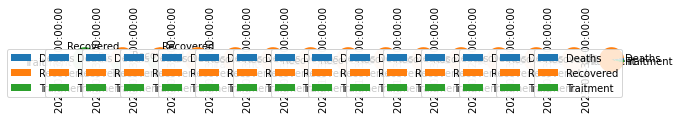

In [80]:
df_monthly[['Deaths', 'Recovered','Traitment']].T.plot(figsize=(10,7), kind='pie', subplots=True)

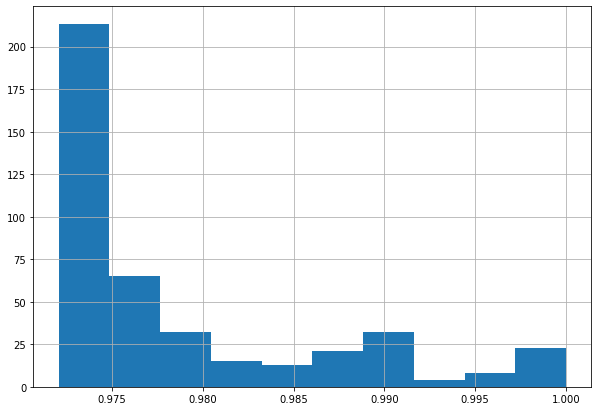

In [81]:
df_chile['rate'] = 1- df_chile['Deaths']/ df_chile['Confirmed']
df_chile['rate'].hist(figsize=(10,7), bins=10)

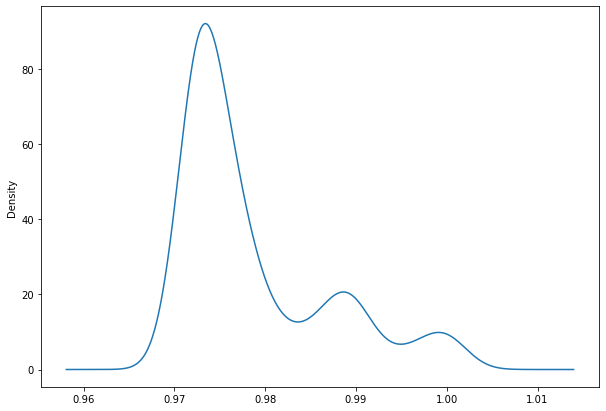

In [86]:
df_chile['rate'].plot(kind='kde',figsize=(10,7))